Librerías

In [ ]:
from sklearn import tree
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn import preprocessing
from sklearn import neural_network
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import resample
from flask import Flask,render_template,request,jsonify,redirect
from google.colab import drive

Lectura de Dataset

In [ ]:
drive.mount("/content/gdrive")
input_file = "/content/gdrive/MyDrive/Colab Notebooks/Depresion/Depresion_v2.csv"

Mounted at /content/gdrive


Preprocesamiento

In [ ]:
df = pd.read_csv(input_file)

df = df.replace("M", 0)
df = df.replace("F", 1)
df = df.replace("Soltero", 0)
df = df.replace("Conviviente", 1)
df = df.replace("Casado", 2)
df = df.replace("Divorciado", 3)
df = df.replace("Viudo", 4)
df = df.replace("Si", 1)
df = df.replace("No", 0)

X = df.iloc[:, 1:-1] #Variables
y = df["Depresion"] #Clase

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X) #Normalizando

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Separación de entrenamiento y prueba

Balanceo de datos

In [ ]:
may = df[df['Depresion'] == 0]
min = df[df['Depresion'] == 1]

min_up = resample(min, replace=True, n_samples=563, random_state=123)
df_up = pd.concat([may, min_up])
df_up = df_up.reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True) #Aleatorizando

X_bal1 = df_up.iloc[:, 1:-1] #Variables
y_bal1 = df_up["Depresion"] #Clase

may_down = resample(may, replace=True, n_samples=112, random_state=123)
df_down = pd.concat([may_down, min])
df_down = df_down.reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True) #Aleatorizando

X_bal2 = df_down.iloc[:, 1:-1] #Variables
y_bal2 = df_down["Depresion"] #Clase

X_bal1_train, X_bal1_test, y_bal1_train, y_bal1_test = train_test_split(X_bal1, y_bal1, test_size=0.3, random_state=1) #Separación de entrenamiento y prueba (Up)
X_bal2_train, X_bal2_test, y_bal2_train, y_bal2_test = train_test_split(X_bal2, y_bal2, test_size=0.3, random_state=1) #Separación de entrenamiento y prueba (Down)

Árbol de Decisión

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Sin balanceo\n")
print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Report:\n", metrics.classification_report(y_test, y_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
#tree.plot_tree(clf)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_bal1_train, y_bal1_train)

y_bal1_pred = clf.predict(X_bal1_test)
print("\nCon balanceo up\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal1_test, y_bal1_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal1_test, y_bal1_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal1_test, y_bal1_pred))

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_bal2_train, y_bal2_train)

y_bal2_pred = clf.predict(X_bal2_test)
print("\nCon balanceo down\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal2_test, y_bal2_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal2_test, y_bal2_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal2_test, y_bal2_pred))

Sin balanceo

Accuracy:
 0.8719211822660099 

Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       173
           1       0.57      0.57      0.57        30

    accuracy                           0.87       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.87      0.87      0.87       203
 

Confusion matrix:
 [[160  13]
 [ 13  17]]

Con balanceo up

Accuracy:
 0.9053254437869822 

Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       170
           1       0.86      0.96      0.91       168

    accuracy                           0.91       338
   macro avg       0.91      0.91      0.91       338
weighted avg       0.91      0.91      0.91       338
 

Confusion matrix:
 [[144  26]
 [  6 162]]

Con balanceo down

Accuracy:
 0.75 

Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.7

Naive Bayes

In [ ]:
clf = naive_bayes.GaussianNB()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Report:\n", metrics.classification_report(y_test, y_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

clf = naive_bayes.GaussianNB()
clf = clf.fit(X_bal1_train, y_bal1_train)

y_bal1_pred = clf.predict(X_bal1_test)
print("\nCon balanceo up\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal1_test, y_bal1_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal1_test, y_bal1_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal1_test, y_bal1_pred))

clf = naive_bayes.GaussianNB()
clf = clf.fit(X_bal2_train, y_bal2_train)

y_bal2_pred = clf.predict(X_bal2_test)
print("\nCon balanceo down\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal2_test, y_bal2_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal2_test, y_bal2_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal2_test, y_bal2_pred))

Accuracy:
 0.8669950738916257 

Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       173
           1       0.54      0.70      0.61        30

    accuracy                           0.87       203
   macro avg       0.74      0.80      0.76       203
weighted avg       0.89      0.87      0.87       203
 

Confusion matrix:
 [[155  18]
 [  9  21]]

Con balanceo up

Accuracy:
 0.834319526627219 

Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       170
           1       0.86      0.80      0.83       168

    accuracy                           0.83       338
   macro avg       0.84      0.83      0.83       338
weighted avg       0.84      0.83      0.83       338
 

Confusion matrix:
 [[148  22]
 [ 34 134]]

Con balanceo down

Accuracy:
 0.8235294117647058 

Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85

Support Vector Machines

In [ ]:
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Report:\n", metrics.classification_report(y_test, y_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

clf = svm.SVC()
clf = clf.fit(X_bal1_train, y_bal1_train)

y_bal1_pred = clf.predict(X_bal1_test)
print("\nCon balanceo up\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal1_test, y_bal1_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal1_test, y_bal1_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal1_test, y_bal1_pred))

clf = svm.SVC()
clf = clf.fit(X_bal2_train, y_bal2_train)

y_bal2_pred = clf.predict(X_bal2_test)
print("\nCon balanceo down\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal2_test, y_bal2_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal2_test, y_bal2_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal2_test, y_bal2_pred))

Accuracy:
 0.916256157635468 

Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       173
           1       0.76      0.63      0.69        30

    accuracy                           0.92       203
   macro avg       0.85      0.80      0.82       203
weighted avg       0.91      0.92      0.91       203
 

Confusion matrix:
 [[167   6]
 [ 11  19]]

Con balanceo up

Accuracy:
 0.8550295857988166 

Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       170
           1       0.89      0.80      0.85       168

    accuracy                           0.86       338
   macro avg       0.86      0.85      0.85       338
weighted avg       0.86      0.86      0.85       338
 

Confusion matrix:
 [[154  16]
 [ 33 135]]

Con balanceo down

Accuracy:
 0.7352941176470589 

Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.77

Random Forest

In [ ]:
clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Report:\n", metrics.classification_report(y_test, y_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_bal1_train, y_bal1_train)

y_bal1_pred = clf.predict(X_bal1_test)
print("\nCon balanceo up\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal1_test, y_bal1_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal1_test, y_bal1_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal1_test, y_bal1_pred))

clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_bal2_train, y_bal2_train)

y_bal2_pred = clf.predict(X_bal2_test)
print("\nCon balanceo down\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal2_test, y_bal2_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal2_test, y_bal2_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal2_test, y_bal2_pred))

Accuracy:
 0.8916256157635468 

Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       173
           1       1.00      0.27      0.42        30

    accuracy                           0.89       203
   macro avg       0.94      0.63      0.68       203
weighted avg       0.90      0.89      0.86       203
 

Confusion matrix:
 [[173   0]
 [ 22   8]]

Con balanceo up

Accuracy:
 0.8372781065088757 

Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       170
           1       0.86      0.81      0.83       168

    accuracy                           0.84       338
   macro avg       0.84      0.84      0.84       338
weighted avg       0.84      0.84      0.84       338
 

Confusion matrix:
 [[147  23]
 [ 32 136]]

Con balanceo down

Accuracy:
 0.7941176470588235 

Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.8

Redes Neuronales Multicapas

In [ ]:
clf = neural_network.MLPClassifier(random_state=1, max_iter=300)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:\n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Report:\n", metrics.classification_report(y_test, y_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_bal1_train, y_bal1_train)

y_bal1_pred = clf.predict(X_bal1_test)
print("\nCon balanceo up\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal1_test, y_bal1_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal1_test, y_bal1_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal1_test, y_bal1_pred))

clf = ensemble.RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_bal2_train, y_bal2_train)

y_bal2_pred = clf.predict(X_bal2_test)
print("\nCon balanceo down\n")
print("Accuracy:\n", metrics.accuracy_score(y_bal2_test, y_bal2_pred), "\n")
print("Report:\n", metrics.classification_report(y_bal2_test, y_bal2_pred), "\n")
print("Confusion matrix:\n", metrics.confusion_matrix(y_bal2_test, y_bal2_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy:
 0.8916256157635468 

Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       173
           1       0.63      0.63      0.63        30

    accuracy                           0.89       203
   macro avg       0.78      0.78      0.78       203
weighted avg       0.89      0.89      0.89       203
 

Confusion matrix:
 [[162  11]
 [ 11  19]]

Con balanceo up

Accuracy:
 0.8372781065088757 

Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       170
           1       0.86      0.81      0.83       168

    accuracy                           0.84       338
   macro avg       0.84      0.84      0.84       338
weighted avg       0.84      0.84      0.84       338
 

Confusion matrix:
 [[147  23]
 [ 32 136]]

Con balanceo down

Accuracy:
 0.7941176470588235 

Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.8

Clustering

In [ ]:
clf = cluster.KMeans(n_clusters=2, random_state=0).fit(X)

df = pd.DataFrame(data=clf.cluster_centers_)
print("Sin balanceo\n")
print(df.T)

clf = cluster.KMeans(n_clusters=2, random_state=0).fit(X_bal1)

df = pd.DataFrame(data=clf.cluster_centers_)
print("\nCon balanceo up\n")
print(df.T)

clf = cluster.KMeans(n_clusters=2, random_state=0).fit(X_bal2)

df = pd.DataFrame(data=clf.cluster_centers_)
print("\nCon balanceo down\n")
print(df.T)

Sin balanceo

           0         1
0   0.213454  0.250222
1   0.509363  0.666667
2   0.176498  0.235816
3   0.042447  0.394799
4   0.046816  0.274232
5   0.038077  0.302600
6   0.095506  0.430260
7   0.111111  0.295508
8   0.044320  0.321513
9   0.053059  0.406619
10  0.152934  0.418440
11  0.021223  0.160757
12  0.084270  0.505910
13  0.111111  0.401891
14  0.125468  0.430260
15  0.084270  0.503546
16  0.036205  0.340426
17  0.194132  0.451537
18  0.299625  0.496454
19  0.028714  0.189125
20  0.234082  0.463357
21  0.179775  0.446809
22  0.187890  0.446809
23  0.083645  0.347518

Con balanceo up

            0          1
0   24.078283  58.113772
1    0.607323   0.544910
2    0.424242   1.859281
3    0.570707   0.835329
4    0.422980   0.655689
5    0.467172   0.538922
6    0.684343   1.065868
7    0.549242   0.643713
8    0.561869   0.461078
9    0.626263   0.685629
10   0.869949   0.844311
11   0.327020   0.275449
12   0.694444   1.170659
13   0.618687   0.982036
14   0.744949   0.

Leyendo DepresionUNI


In [ ]:
input_file = "/content/gdrive/MyDrive/Colab Notebooks/Depresion/DepresionUNI.csv"

df = pd.read_csv(input_file)

df = df.replace("M", 0)
df = df.replace("F", 1)
df = df.replace("Soltero", 0)
df = df.replace("Conviviente", 1)
df = df.replace("Casado", 2)
df = df.replace("Divorciado", 3)
df = df.replace("Viudo", 4)
df = df.replace("Si", 1)
df = df.replace("No", 0)

min_max_scaler = preprocessing.MinMaxScaler()
test_uni = min_max_scaler.fit_transform(df) #Normalizando

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
print(smt)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [ ]:
X_smt, y_smt = smt.fit_resample(X, y)
print(X_smt, y_smt)

[[0.953125   1.         1.         ... 0.33333333 0.         0.        ]
 [0.140625   1.         0.5        ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.66666667 0.         0.        ]
 ...
 [0.64999738 0.         0.15006294 ... 0.59997203 0.46672261 0.40002797]
 [0.30300545 0.         0.41072767 ... 0.11902977 0.39284822 0.05951489]
 [0.02170337 1.         0.08681347 ... 0.33333333 0.66666667 0.23150259]] [0 0 0 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_smt_train, X_smt_test, y_smt_train, y_smt_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

Hiper parámetros con SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=157,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=8,bootstrap=False,
                                  n_jobs = 4,random_state=49)

In [ ]:
model_rf.fit(X_smt_train, y_smt_train)

model_smt = model_rf

In [ ]:
# Generar las predicciones:
y_pred_train_smt= model_smt.predict(X_smt_train)
y_pred_test_smt= model_smt.predict(X_smt_test)

# Generar las probabilidades
y_pred_proba_train_smt= model_smt.predict_proba(X_smt_train)[:,1]
y_pred_proba_test_smt= model_smt.predict_proba(X_smt_test)[:,1]

In [ ]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf) 

def fx_evaluate_classif(y_real, pred, pred_proba):
    from sklearn import metrics as mt
    matriz_conf = mt.confusion_matrix(y_real,pred)
    print_mc(matriz_conf)
    roc = mt.roc_auc_score(y_real,pred_proba)
    accuracy_real = mt.accuracy_score(y_real,pred)
    print("\nROC: ", roc) 
    print("Accu:", accuracy_real,'\n')
    print(mt.classification_report(y_real, pred)[0:163])

print("Metricas del Training..." + "\n")
fx_evaluate_classif(y_smt_train, y_pred_train_smt, y_pred_proba_train_smt)
print("Metricas del Testing..." + "\n")
fx_evaluate_classif(y_smt_test, y_pred_test_smt, y_pred_proba_test_smt)

Metricas del Training...

        Pred_0  Pred_1
Real_0     388       1
Real_1       9     390

ROC:  0.9998099361514325
Accu: 0.9873096446700508 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       389
           1       1.00      0.98      0.99       399

Metricas del Testing...

        Pred_0  Pred_1
Real_0     167       7
Real_1      14     150

ROC:  0.9759076254555649
Accu: 0.9378698224852071 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       174
           1       0.96      0.91      0.93       164



Testeo UNI

           Sin Depresion  Con Depresion
Genero                                 
Masculino             33             21
Femenino              10             11
      Sin Depresion  Con Depresion
Edad                              
17                2              1
18                1              3
19                1              2
20                6              4
21                7              9
22                8              5
23                7              2
24                4              3
25                2              0
26                0              1
28                1              0
30                2              0
34                1              1
42                1              0
59                0              1
    Edad  Genero  Estado Civil  P1  P2  P3  ...  P17  P18  P19  P20  P21  Prediccion
0     21       0             0   0   0   0  ...    0    0    0    0    0           0
1     20       0             0   1   1   0  ...    0    0    3    3    0   

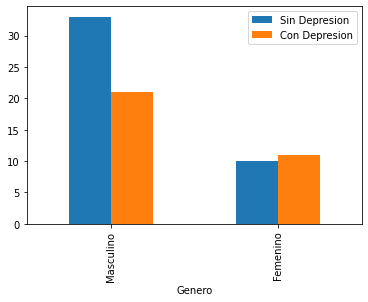

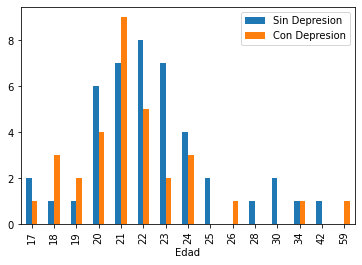

In [ ]:
y_pred_uni= model_smt.predict(test_uni)

df["Prediccion"] = y_pred_uni

df_genero = pd.DataFrame({
    'Genero': ["Masculino", "Femenino"],
    'Sin Depresion':[33, 10],
    'Con Depresion':[21, 11]
})
df_genero.index = df_genero["Genero"]
del df_genero["Genero"]
print(df_genero)
df_genero.plot(kind='bar')

df_edad = pd.DataFrame({
    'Edad': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 34, 42, 59],
    'Sin Depresion': [2, 1, 1, 6, 7, 8, 7, 4, 2, 0, 1, 2, 1, 1, 0],
    'Con Depresion': [1, 3, 2, 4, 9, 5, 2, 3, 0, 1, 0, 0, 1, 0, 1]
})
df_edad.index = df_edad["Edad"]
del df_edad["Edad"]
print(df_edad)
df_edad.plot(kind='bar')

print(df)
print(df.groupby(["Edad", "Prediccion"]).size())
print(df.groupby(["Genero", "Prediccion"]).size())